# On one image (flow)

In [4]:
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

In [6]:
img = image.load_img(r'E:\Deep_Learning\Lessons\11-Data-Augemention\test\cat.1.jpg',target_size=(200,200))

In [7]:
import matplotlib.pyplot as plt

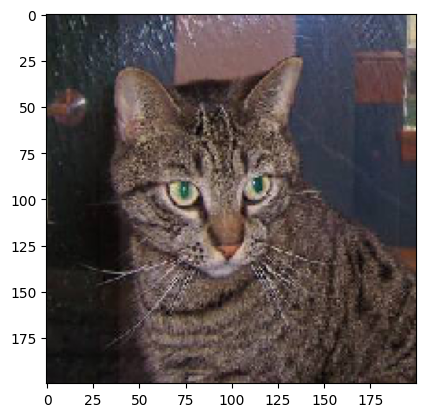

In [8]:
plt.imshow(img)

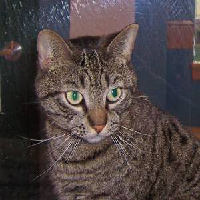

In [9]:
img

In [10]:
type(img)

PIL.Image.Image

In [38]:
datagen = ImageDataGenerator(rotation_range=30,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=False,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            brightness_range=(1,5))

In [39]:
img = image.img_to_array(img)

In [40]:
img

array([[[ 39.,  44.,  40.],
        [ 40.,  44.,  43.],
        [ 41.,  45.,  46.],
        ...,
        [210., 209., 181.],
        [207., 204., 171.],
        [201., 199., 161.]],

       [[ 40.,  45.,  41.],
        [ 40.,  44.,  43.],
        [ 40.,  44.,  45.],
        ...,
        [201., 197., 170.],
        [199., 196., 165.],
        [198., 195., 160.]],

       [[ 39.,  44.,  40.],
        [ 38.,  42.,  41.],
        [ 37.,  41.,  42.],
        ...,
        [195., 191., 166.],
        [198., 193., 164.],
        [205., 200., 168.]],

       ...,

       [[ 29.,  27.,  28.],
        [ 25.,  23.,  24.],
        [ 22.,  20.,  21.],
        ...,
        [ 50.,  37.,  31.],
        [ 41.,  28.,  22.],
        [ 49.,  38.,  32.]],

       [[ 32.,  30.,  31.],
        [ 26.,  24.,  25.],
        [ 23.,  21.,  22.],
        ...,
        [ 37.,  24.,  18.],
        [ 36.,  23.,  17.],
        [ 57.,  46.,  40.]],

       [[ 32.,  30.,  31.],
        [ 25.,  23.,  24.],
        [ 21.,  

In [41]:
img.shape

(200, 200, 3)

In [42]:
type(img)

numpy.ndarray

In [43]:
input_batch = img.reshape((1,200,200,3))

In [44]:
i=0

for output in datagen.flow(input_batch,batch_size=1,save_to_dir='aug'):
    i = i+1
    if i ==10:
        break

# On full data (flow_from_directory)

In [19]:
train_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              horizontal_flip=True,
                              zoom_range=0.2 )

test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(r'E:\Deep_Learning\Projects\4-Dog_vs_Cat\train',
                                               target_size=(150,150),
                                               batch_size=16,
                                               class_mode='binary')

validation_generator = test_gen.flow_from_directory(r'E:\Deep_Learning\Projects\4-Dog_vs_Cat\test',
                                                   target_size=(150,150),
                                                   batch_size=16,
                                                   class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense , Conv2D,MaxPooling2D , Flatten

In [26]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 1)                

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.fit_generator(train_generator,              ### now fit also supports generator
                   steps_per_epoch=2000//16,       ### total number of samples // batch_size 
                   epochs=2,
                   validation_data=validation_generator,
                   validation_steps=800//16)

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_7096\823035094.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/2
12/12 [==============================] - 36s 3s/step - loss: 0.7484 - accuracy: 0.5052 - val_loss: 0.6919 - val_accuracy: 0.5138
Epoch 2/2
12/12 [==============================] - 26s 2s/step - loss: 0.6955 - accuracy: 0.4375 - val_loss: 0.6918 - val_accuracy: 0.5688
